In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.patches import FancyArrowPatch

In [168]:
df = pd.read_csv('C:/Users/Rémi/Documents/stage/stage_Dynateam/Stage_DynaTeam/data/donnees_brute/Etude 4.3. rugby/data/tracking GPS - pedagogie emergente.csv')
df_seq = pd.read_csv("C:/Users/Rémi/Documents/stage/stage_Dynateam/Stage_DynaTeam/data/donnees_brute/Etude 4.3. rugby/data/event sequencage - pedagogie emergente.csv", sep=';')

C:\Users\Rémi\AppData\Local\Temp\ipykernel_8552\1714484569.py:1: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Rémi/Documents/stage/stage_Dynateam/Stage_DynaTeam/data/donnees_brute/Etude 4.3. rugby/data/tracking GPS - pedagogie emergente.csv')


In [169]:
df

,Unnamed: 0,Possession,GPS,Time,X,Y,Team,Player,Frame,Position,ID
0,1,1,12,0.24,-4.859677,-10.750143,Att,3.0,2.0,240.0,3
1,2,1,12,0.26,-4.820556,-10.794123,Att,3.0,2.0,260.0,3
2,3,1,12,0.28,-4.781435,-10.838104,Att,3.0,2.0,280.0,3
3,4,1,12,0.30,-4.742313,-10.882084,Att,3.0,3.0,300.0,3
4,5,1,12,0.32,-4.689796,-10.925258,Att,3.0,3.0,320.0,3
...,...,...,...,...,...,...,...,...,...,...,...
220817,220818,43,Ball,2178.76,36.115058,23.408468,Att,2.0,21787.0,2178760.0,Ball
220818,220819,43,Ball,2178.78,36.213258,23.401453,Att,2.0,21787.0,2178780.0,Ball
220819,220820,43,Ball,2178.80,36.311458,23.394437,Att,2.0,21788.0,2178800.0,Ball
220820,220821,43,Ball,2178.82,36.408081,23.422931,Att,2.0,21788.0,2178820.0,Ball


In [170]:
df_possession_1 = df[(df['Possession'] == 1) & (df['GPS'] != 'Ball')]
df_possession_1

,Unnamed: 0,Possession,GPS,Time,X,Y,Team,Player,Frame,Position,ID
0,1,1,12,0.24,-4.859677,-10.750143,Att,3.0,2.0,240.0,3
1,2,1,12,0.26,-4.820556,-10.794123,Att,3.0,2.0,260.0,3
2,3,1,12,0.28,-4.781435,-10.838104,Att,3.0,2.0,280.0,3
3,4,1,12,0.30,-4.742313,-10.882084,Att,3.0,3.0,300.0,3
4,5,1,12,0.32,-4.689796,-10.925258,Att,3.0,3.0,320.0,3
...,...,...,...,...,...,...,...,...,...,...,...
10486,10487,1,40,16.28,6.548697,6.346741,Def,16.0,162.0,16280.0,1
10487,10488,1,40,16.30,6.548201,6.349637,Def,16.0,163.0,16300.0,1
10488,10489,1,40,16.32,6.548201,6.349637,Def,16.0,163.0,16320.0,1
10489,10490,1,40,16.34,6.548201,6.349637,Def,16.0,163.0,16340.0,1


In [171]:
print(df_possession_1['X'].min())
print(df_possession_1['X'].max())
print(df_possession_1['Y'].min())
print(df_possession_1['Y'].max())

-6.96901449933595
39.8103755796581
-28.0922668902807
6.59522526097837


In [172]:
players = df_possession_1['Player'].unique()
players

array([ 3., 12., 13.,  6.,  1.,  2., 11., 15., 14., 17.,  5.,  4., 16.])

In [173]:
player_data = {player: df_possession_1[df_possession_1['Player'] == player] for player in players}

player_data[2]

,Unnamed: 0,Possession,GPS,Time,X,Y,Team,Player,Frame,Position,ID
4035,4036,1,29,0.24,-0.246097,-3.833314,Att,2.0,2.0,240.0,2
4036,4037,1,29,0.26,-0.215580,-3.853425,Att,2.0,2.0,260.0,2
4037,4038,1,29,0.28,-0.185062,-3.873537,Att,2.0,2.0,280.0,2
4038,4039,1,29,0.30,-0.154545,-3.893649,Att,2.0,3.0,300.0,2
4039,4040,1,29,0.32,-0.093058,-3.923358,Att,2.0,3.0,320.0,2
...,...,...,...,...,...,...,...,...,...,...,...
4837,4838,1,29,16.28,14.341568,-7.568276,Att,2.0,162.0,16280.0,2
4838,4839,1,29,16.30,14.346403,-7.557011,Att,2.0,163.0,16300.0,2
4839,4840,1,29,16.32,14.348799,-7.544673,Att,2.0,163.0,16320.0,2
4840,4841,1,29,16.34,14.351196,-7.532336,Att,2.0,163.0,16340.0,2


In [174]:
df_possession_1_ball = df[(df['Possession'] == 1) & (df['GPS'] == 'Ball')]
df_possession_1_ball

,Unnamed: 0,Possession,GPS,Time,X,Y,Team,Player,Frame,Position,ID
205049,205050,1,Ball,0.24,-0.246097,-3.833314,Att,2.0,2.0,240.0,Ball
205050,205051,1,Ball,0.26,-0.329845,-4.078137,NaN,NaN,NaN,260.0,Ball
205051,205052,1,Ball,0.28,-0.413593,-4.322960,NaN,NaN,NaN,280.0,Ball
205052,205053,1,Ball,0.30,-0.497341,-4.567783,NaN,NaN,NaN,300.0,Ball
205053,205054,1,Ball,0.32,-0.581089,-4.812606,NaN,NaN,NaN,320.0,Ball
...,...,...,...,...,...,...,...,...,...,...,...
205851,205852,1,Ball,16.28,39.558478,0.102267,Att,6.0,162.0,16280.0,Ball
205852,205853,1,Ball,16.30,39.629637,0.095087,Att,6.0,163.0,16300.0,Ball
205853,205854,1,Ball,16.32,39.689883,0.072618,Att,6.0,163.0,16320.0,Ball
205854,205855,1,Ball,16.34,39.750129,0.050149,Att,6.0,163.0,16340.0,Ball


In [175]:
df_possession_1['Carrier'] = False
df_possession_1

C:\Users\Rémi\AppData\Local\Temp\ipykernel_8552\1925879037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_possession_1['Carrier'] = False


,Unnamed: 0,Possession,GPS,Time,X,Y,Team,Player,Frame,Position,ID,Carrier
0,1,1,12,0.24,-4.859677,-10.750143,Att,3.0,2.0,240.0,3,False
1,2,1,12,0.26,-4.820556,-10.794123,Att,3.0,2.0,260.0,3,False
2,3,1,12,0.28,-4.781435,-10.838104,Att,3.0,2.0,280.0,3,False
3,4,1,12,0.30,-4.742313,-10.882084,Att,3.0,3.0,300.0,3,False
4,5,1,12,0.32,-4.689796,-10.925258,Att,3.0,3.0,320.0,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10486,10487,1,40,16.28,6.548697,6.346741,Def,16.0,162.0,16280.0,1,False
10487,10488,1,40,16.30,6.548201,6.349637,Def,16.0,163.0,16300.0,1,False
10488,10489,1,40,16.32,6.548201,6.349637,Def,16.0,163.0,16320.0,1,False
10489,10490,1,40,16.34,6.548201,6.349637,Def,16.0,163.0,16340.0,1,False


In [176]:
for i in df_possession_1_ball.iterrows():
    row = i[1]  # i[0] est l'index, i[1] est la série de données (la ligne)
    if row['Player'] in [1, 2, 3, 4, 5, 6]:
        time = row['Time']
        player = row['Player']
        df_possession_1.loc[(df_possession_1['Time'] == time) & (df_possession_1['Player'] == player), 'Carrier'] = True

In [177]:
df_possession_1.iloc[36]

Unnamed: 0           37
Possession            1
GPS                  12
Time               0.96
X             -2.956497
Y            -12.193437
Team                Att
Player              3.0
Frame               9.0
Position          960.0
ID                    3
Carrier            True
Name: 36, dtype: object

In [178]:
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def player_in_range(p1, p2):
    return distance(p1, p2) < 15

p1 = df_possession_1.iloc[2]
p2 = df_possession_1.iloc[2422]

print(player_in_range((p1['X'], p1['Y']), (p2['X'], p2['Y'])))

True


In [179]:
df_possession_1_3 = df_possession_1[df_possession_1['Player'] == 3]
df_possession_1_3

,Unnamed: 0,Possession,GPS,Time,X,Y,Team,Player,Frame,Position,ID,Carrier
0,1,1,12,0.24,-4.859677,-10.750143,Att,3.0,2.0,240.0,3,False
1,2,1,12,0.26,-4.820556,-10.794123,Att,3.0,2.0,260.0,3,False
2,3,1,12,0.28,-4.781435,-10.838104,Att,3.0,2.0,280.0,3,False
3,4,1,12,0.30,-4.742313,-10.882084,Att,3.0,3.0,300.0,3,False
4,5,1,12,0.32,-4.689796,-10.925258,Att,3.0,3.0,320.0,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,1,12,16.28,20.307173,-1.840371,Att,3.0,162.0,16280.0,3,False
803,804,1,12,16.30,20.305025,-1.854156,Att,3.0,163.0,16300.0,3,False
804,805,1,12,16.32,20.300437,-1.866870,Att,3.0,163.0,16320.0,3,False
805,806,1,12,16.34,20.295850,-1.879583,Att,3.0,163.0,16340.0,3,False


In [180]:
# Calculer le gradient (différence entre positions successives)
def calculate_gradient(df):
    # Créer des copies des coordonnées décalées d'une ligne
    df['X_prev'] = df['X'].shift(1)
    df['Y_prev'] = df['Y'].shift(1)
    
    # Calculer les différences (gradient)
    df['gradient_X'] = df['X'] - df['X_prev']
    df['gradient_Y'] = df['Y'] - df['Y_prev']
    
    # Calculer la magnitude du gradient (distance parcourue)
    df['gradient_magnitude'] = np.sqrt(df['gradient_X']**2 + df['gradient_Y']**2)
    
    # Calculer l'angle du déplacement en radians puis convertir en degrés
    df['gradient_angle'] = np.arctan2(df['gradient_Y'], df['gradient_X']) * 180 / np.pi
    
    # La première ligne aura des NaN car il n'y a pas de position précédente
    return df.fillna(0)

In [181]:
def create_player_gradient_animation(df):
    # Calculer le gradient
    df = calculate_gradient(df)
    
    # Créer la figure et l'axe
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Définir les limites basées sur les données
    x_margin = (df['X'].max() - df['X'].min()) * 0.1
    y_margin = (df['Y'].max() - df['Y'].min()) * 0.1
    
    ax.set_xlim(df['X'].min() - x_margin, df['X'].max() + x_margin)
    ax.set_ylim(df['Y'].min() - y_margin, df['Y'].max() + y_margin)
    
    # Tracer la trajectoire complète en arrière-plan (en gris clair)
    ax.plot(df['X'], df['Y'], 'lightgray', alpha=0.5, linewidth=1)
    
    # Objets à animer
    point, = ax.plot([], [], 'ro', markersize=10)  # Point rouge pour le joueur
    
    # Pour la flèche, nous utiliserons FancyArrowPatch qui est plus flexible
    arrow = FancyArrowPatch((0, 0), (0, 0), color='blue', linewidth=2, 
                          arrowstyle='->', mutation_scale=15)
    ax.add_patch(arrow)
    
    # Texte pour afficher le temps
    time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
    
    # Échelle pour la flèche du gradient (pour qu'elle soit visible)
    arrow_scale = 5  # Ajuster selon la magnitude typique du gradient

 # Fonction d'initialisation
    def init():
        point.set_data([], [])
        arrow.set_positions((0, 0), (0, 0))
        time_text.set_text('')
        return point, arrow, time_text
    
    # Fonction d'animation
    def animate(i):
        x = df['X'].iloc[i]
        y = df['Y'].iloc[i]
        
        # Mettre à jour la position du point
        point.set_data([x], [y])
        
        # Calculer les coordonnées de la flèche
        dx = df['gradient_X'].iloc[i] * arrow_scale
        dy = df['gradient_Y'].iloc[i] * arrow_scale
        
        # Mettre à jour la flèche
        arrow.set_positions((x, y), (x + dx, y + dy))
        
        # Mettre à jour le texte de temps
        time_text.set_text(f'Temps: {df["Time"].iloc[i]:.2f}s')
        
        return point, arrow, time_text
    
    # Créer l'animation
    anim = FuncAnimation(fig, animate, frames=len(df),
                         init_func=init, blit=True, interval=100)
    
    # Ajouter les légendes et titres
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Animation du joueur avec gradient de déplacement')
    ax.grid(True)
    
    # Légende personnalisée
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Position du joueur'),
        Line2D([0], [0], color='blue', marker='>', markersize=10, label='Direction du gradient')
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    return fig, anim

# Fonction principale pour utiliser avec vos données
def visualize_player_gradient(df_possession_1_3):
    fig, anim = create_player_gradient_animation(df_possession_1_3)
    plt.tight_layout()
    
    # Pour sauvegarder l'animation (décommentez si nécessaire)
    # anim.save('player_gradient_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
    
    plt.show()
    return anim


C:\Users\Rémi\AppData\Local\Temp\ipykernel_8552\1699426053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X_prev'] = df['X'].shift(1)
C:\Users\Rémi\AppData\Local\Temp\ipykernel_8552\1699426053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y_prev'] = df['Y'].shift(1)
C:\Users\Rémi\AppData\Local\Temp\ipykernel_8552\1699426053.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

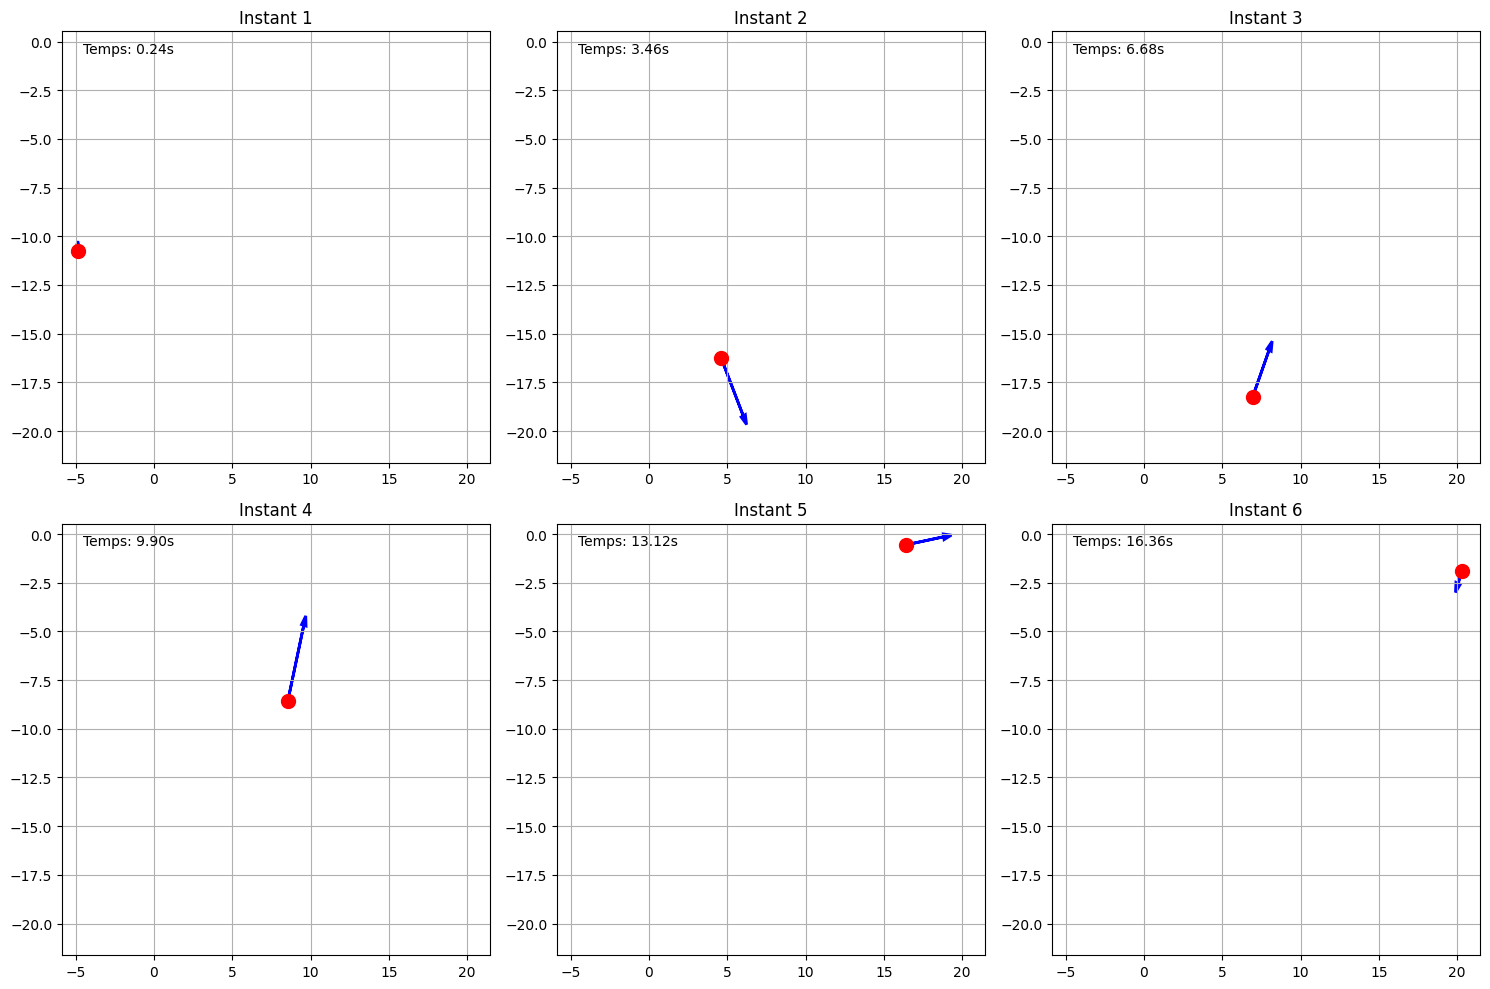

In [182]:
# Version statique pour visualiser quelques instants clés
def create_static_gradient_visualization(df, num_frames=6):
    # Calculer le gradient
    df = calculate_gradient(df)
    
    # Sélectionner des instants régulièrement espacés
    indices = np.linspace(0, len(df)-1, num_frames, dtype=int)
    
    # Créer une grille de sous-figures
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    # Définir les limites globales
    x_min, x_max = df['X'].min(), df['X'].max()
    y_min, y_max = df['Y'].min(), df['Y'].max()
    
    # Échelle pour la flèche du gradient
    arrow_scale = 50
    
    # Tracer chaque instant sélectionné
    for i, idx in enumerate(indices):
        if i >= len(axes):
            break
            
        ax = axes[i]
        
        # Position actuelle
        x, y = df['X'].iloc[idx], df['Y'].iloc[idx]
        
        # Tracer le point représentant le joueur
        ax.plot(x, y, 'ro', markersize=10)
        
        # Tracer la flèche du gradient
        dx = df['gradient_X'].iloc[idx] * arrow_scale
        dy = df['gradient_Y'].iloc[idx] * arrow_scale
        
        ax.arrow(x, y, dx, dy, head_width=0.3, head_length=0.5, 
                 fc='blue', ec='blue', linewidth=2)
        
        # Ajouter le temps
        ax.text(0.05, 0.95, f'Temps: {df["Time"].iloc[idx]:.2f}s', 
                transform=ax.transAxes, fontsize=10)
        
        # Limites uniformes pour tous les graphiques
        ax.set_xlim(x_min - 1, x_max + 1)
        ax.set_ylim(y_min - 1, y_max + 1)
        
        ax.grid(True)
        ax.set_title(f'Instant {i+1}')
    
    plt.tight_layout()
    return fig

# Exemple d'utilisation de la version statique

fig = create_static_gradient_visualization(df_possession_1_3)
plt.show()

In [183]:
df_seq

,Position,Possession,Condition,Serie,Defense,Cote,Passeur,Receveur,Contact,Pied,Resultat
0,37320,1,EMERGENT,PRE,OUVERT,GAUCHE,1.0,NaN,NaN,NaN,NaN
1,37960,1,EMERGENT,PRE,OUVERT,GAUCHE,NaN,2.0,NaN,NaN,NaN
2,39000,1,EMERGENT,PRE,OUVERT,GAUCHE,2.0,NaN,NaN,NaN,NaN
3,39760,1,EMERGENT,PRE,OUVERT,GAUCHE,NaN,5.0,NaN,NaN,NaN
4,41600,1,EMERGENT,PRE,OUVERT,GAUCHE,5.0,NaN,contact,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
321,1810280,44,EMERGENT,POST,SERRE,DROITE,1.0,NaN,NaN,NaN,NaN
322,1810880,44,EMERGENT,POST,SERRE,DROITE,NaN,4.0,NaN,NaN,NaN
323,1815680,44,EMERGENT,POST,SERRE,DROITE,4.0,NaN,contact,NaN,NaN
324,1816000,44,EMERGENT,POST,SERRE,DROITE,NaN,3.0,NaN,NaN,NaN


In [184]:
df_seq['Possession'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [185]:
seq_1 = df_seq[df_seq["Possession"] == 1]

In [186]:
seq_1

,Position,Possession,Condition,Serie,Defense,Cote,Passeur,Receveur,Contact,Pied,Resultat
0,37320,1,EMERGENT,PRE,OUVERT,GAUCHE,1.0,NaN,NaN,NaN,NaN
1,37960,1,EMERGENT,PRE,OUVERT,GAUCHE,NaN,2.0,NaN,NaN,NaN
2,39000,1,EMERGENT,PRE,OUVERT,GAUCHE,2.0,NaN,NaN,NaN,NaN
3,39760,1,EMERGENT,PRE,OUVERT,GAUCHE,NaN,5.0,NaN,NaN,NaN
4,41600,1,EMERGENT,PRE,OUVERT,GAUCHE,5.0,NaN,contact,NaN,NaN
5,41960,1,EMERGENT,PRE,OUVERT,GAUCHE,NaN,6.0,NaN,NaN,NaN
6,42120,1,EMERGENT,PRE,OUVERT,GAUCHE,NaN,NaN,NaN,NaN,ballon perdu


In [187]:
def build_chain_pass(seq):
    temp = seq['Passeur'].unique()
    r = [i for i in temp if not pd.isna(i)]
    return r

In [188]:
def compar_chain(chain):
    return chain == [3, 6]

In [189]:
build_chain_pass(seq_1)


[np.float64(1.0), np.float64(2.0), np.float64(5.0)]

In [190]:
res = []
for i in df_seq['Possession'].unique():
    seq = df_seq[df_seq["Possession"] == i]
    res.append(compar_chain(build_chain_pass(seq)))
    
print(res)
print(True in res)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
False


In [ ]:
def zone_influence()